# Schaefer timeseries: data exploration

In [1]:
import pandas as pd
from brain_age_prediction import utils

In [4]:
# define paths
ukbb_dir = '/ritter/share/data/UKBB/ukb_data/bids/'
schaefer_data_dir = '../data/schaefer/'

In [ ]:
# define existing Schaefer variants
variants = ['7n100p','7n200p','7n500p','7n700p','7n1000p','17n100p','17n200p','17n500p','17n700p','17n1000p']

In [ ]:
# initial df with variant 7n100p
schaefer_exists_df = pd.read_csv(schaefer_data_dir+variants[0]+'/schaefer_exists.csv')

## How many timepoints do the timeseries have?

In [ ]:
# limit to available ts
existing = (schaefer_exists_df['schaefer_exists'] == True) 
nonempty = (schaefer_exists_df['is_empty'] == False)
available_schaefer_df = schaefer_exists_df[existing & nonempty].reset_index(drop=True)
# prepare dictionary for counting timepoints
count_dict = {}

# check number of timepoints for each subject
for i in range(len(available_schaefer_df)):
    sub_id = available_schaefer_df.loc[i, 'eid']
    sub_dir = ukbb_dir+'sub-'+str(sub_id)+'/ses-2/func/sub-'+str(sub_id)+'_ses-2_task-rest_Schaefer7n100p.csv.gz'
    # check length of columns
    # subtract 1 for label column
    timepoints = len(pd.read_csv(sub_dir).columns)-1
    # add to count
    if timepoints in count_dict.keys():
        count_dict[timepoints] += 1
    else:
        count_dict[timepoints] = 1

print('{Number of timepoints: number of subjects with these timepoints}')
print(count_dict)

{Number of timepoints: number of subjects with these timepoints}
{490: 39302, 523: 494}


## How many subjects do we currently have usable Schaefer timeseries for?

In [59]:
# merge all supplementary info df's into one
for variant in variants[1:]:
    variant_df = pd.read_csv(schaefer_data_dir+variant+'/schaefer_exists.csv')
    schaefer_exists_df = schaefer_exists_df.merge(variant_df, how='left', on='eid', suffixes=(None,'_'+variant))

# add first variant name to according columns 
rename_dict = {'schaefer_exists': 'schaefer_exists_7n100p',
               'is_empty': 'is_empty_7n100p',
               'contains_nan': 'contains_nan_7n100p',
               'contains_0': 'contains_0_7n100p',
               'location_of_0': 'location_of_0_7n100p'}
schaefer_exists_df.rename(columns=rename_dict, inplace=True)

In [62]:
schaefer_exists_df.describe(include='all')

,eid,schaefer_exists_7n100p,is_empty_7n100p,contains_nan_7n100p,contains_0_7n100p,location_of_0_7n100p,schaefer_exists_7n200p,is_empty_7n200p,contains_nan_7n200p,contains_0_7n200p,...,schaefer_exists_17n700p,is_empty_17n700p,contains_nan_17n700p,contains_0_17n700p,location_of_0_17n700p,schaefer_exists_17n1000p,is_empty_17n1000p,contains_nan_17n1000p,contains_0_17n1000p,location_of_0_17n1000p
count,5.026700e+04,50267,50267,50267,50267,50267,50267,50267,50267,50267,...,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
unique,NaN,2,2,2,2,7,2,2,2,2,...,2,2,2,2,414,2,2,2,2,1171
top,NaN,True,False,False,False,[],True,False,False,False,...,True,False,False,False,[],True,False,False,False,[]
freq,NaN,39856,39796,50263,50258,50258,39856,39792,50231,50223,...,39856,39778,49615,43016,43016,39856,39774,44472,30257,30257
mean,1.314110e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.620444e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000014e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.125696e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.251365e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.377028e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# get simple collections of relevant columns
schaefer_exists = [col for col in schaefer_exists_df.columns if col.startswith('schaefer_exists') == True]
is_empty = [col for col in schaefer_exists_df.columns if col.startswith('is_empty') == True]
contains_nan = [col for col in schaefer_exists_df.columns if col.startswith('contains_nan') == True]
contains_0 = [col for col in schaefer_exists_df.columns if col.startswith('contains_0') == True]
location_of_0 = [col for col in schaefer_exists_df.columns if col.startswith('location') == True]

In [71]:
schaefer_exists_df[schaefer_exists].describe(include='all')

,schaefer_exists_7n100p,schaefer_exists_7n200p,schaefer_exists_7n500p,schaefer_exists_7n700p,schaefer_exists_7n1000p,schaefer_exists_17n100p,schaefer_exists_17n200p,schaefer_exists_17n500p,schaefer_exists_17n700p,schaefer_exists_17n1000p
count,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
unique,2,2,2,2,2,2,2,2,2,2
top,True,True,True,True,True,True,True,True,True,True
freq,39856,39856,39856,39856,39856,39856,39856,39856,39856,39856


The same amount of subjects has downloaded files for each Schaefer variant.

In [72]:
schaefer_exists_df[is_empty].describe(include='all')

,is_empty_7n100p,is_empty_7n200p,is_empty_7n500p,is_empty_7n700p,is_empty_7n1000p,is_empty_17n100p,is_empty_17n200p,is_empty_17n500p,is_empty_17n700p,is_empty_17n1000p
count,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,39796,39792,39788,39788,39786,39789,39787,39783,39778,39774


A different amount of subjects has empty files. Variants with fewer parcellations tend to have fewer empty files, and all parcellation variants with 7 networks have fewer empty files than their 17 networks counterparts.

In [73]:
schaefer_exists_df[contains_nan].describe(include='all')

,contains_nan_7n100p,contains_nan_7n200p,contains_nan_7n500p,contains_nan_7n700p,contains_nan_7n1000p,contains_nan_17n100p,contains_nan_17n200p,contains_nan_17n500p,contains_nan_17n700p,contains_nan_17n1000p
count,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,50263,50231,49739,49615,44472,50263,50231,49739,49615,44472


The same amount of subjects has missing values for each parcellation variant across networks (e.g. 7n100p, 17n100p). Variants with more parcellations also contain more subjects with missing values.

The difference of subjects containing NaN values between 100p and 1000p lies at **5791** subjects.

In [74]:
schaefer_exists_df[contains_0].describe(include='all')

,contains_0_7n100p,contains_0_7n200p,contains_0_7n500p,contains_0_7n700p,contains_0_7n1000p,contains_0_17n100p,contains_0_17n200p,contains_0_17n500p,contains_0_17n700p,contains_0_17n1000p
count,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
unique,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False
freq,50258,50223,48830,43015,30251,50258,50223,48830,43016,30257


For 100-500 parcellations, the same amount of subjects contains parcellation timeseries with only zeros. For 700-100 parcellations, the 7n variants have a few more subjects containing zero-timeseries.

In [75]:
schaefer_exists_df[location_of_0].describe(include='all')

,location_of_0_7n100p,location_of_0_7n200p,location_of_0_7n500p,location_of_0_7n700p,location_of_0_7n1000p,location_of_0_17n100p,location_of_0_17n200p,location_of_0_17n500p,location_of_0_17n700p,location_of_0_17n1000p
count,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
unique,7,26,120,414,1171,7,26,120,414,1171
top,[],[],[],[],[],[],[],[],[],[]
freq,50258,50223,48830,43015,30251,50258,50223,48830,43016,30257


Across networks, the same amount of unique parcellation/network names is affected by the occurrence of zero-timeseries. Variants with more parcellations also have more affected parcellations.

In [322]:
# find out useful files per variant
for variant in variants:
    existence = (schaefer_exists_df['schaefer_exists_'+variant]==True)
    emptiness = (schaefer_exists_df['is_empty_'+variant]==False)
    nans = (schaefer_exists_df['contains_nan_'+variant]==False)
    zeros = (schaefer_exists_df['contains_0_'+variant]==False)
    condition = existence & emptiness & nans & zeros
    print(f'usable files for {variant}: {len(schaefer_exists_df[condition])}')

usable files for 7n100p: 39785
usable files for 7n200p: 39714
usable files for 7n500p: 37862
usable files for 7n700p: 32029
usable files for 7n1000p: 16855
usable files for 17n100p: 39778
usable files for 17n200p: 39709
usable files for 17n500p: 37857
usable files for 17n700p: 32020
usable files for 17n1000p: 16849


In [356]:
# create overview
overview_df = pd.DataFrame(columns=variants, index=['ukbb_subs','schaefer_exists','is_empty','contains_nan','contains_0','is_usable'])
overview_df.loc['ukbb_subs'] = len(schaefer_exists_df)
for variant in variants:
    existence = schaefer_exists_df['schaefer_exists_'+variant]==True
    overview_df.loc['schaefer_exists',variant] = len(schaefer_exists_df[existence])
    overview_df.loc['is_empty',variant] = len(schaefer_exists_df[(existence) & (schaefer_exists_df['is_empty_'+variant]==True)])
    overview_df.loc['contains_nan',variant] = len(schaefer_exists_df[schaefer_exists_df['contains_nan_'+variant]==True])
    overview_df.loc['contains_0',variant] = len(schaefer_exists_df[schaefer_exists_df['contains_0_'+variant]==True])
    emptiness = schaefer_exists_df['is_empty_'+variant]==False
    nans = schaefer_exists_df['contains_nan_'+variant]==False
    zeros = schaefer_exists_df['contains_0_'+variant]==False
    overview_df.loc['is_usable',variant] = len(schaefer_exists_df[(existence) & (emptiness) & (nans) & (zeros)])
overview_df

,7n100p,7n200p,7n500p,7n700p,7n1000p,17n100p,17n200p,17n500p,17n700p,17n1000p
ukbb_subs,50267,50267,50267,50267,50267,50267,50267,50267,50267,50267
schaefer_exists,39856,39856,39856,39856,39856,39856,39856,39856,39856,39856
is_empty,60,64,68,68,70,67,69,73,78,82
contains_nan,4,36,528,652,5795,4,36,528,652,5795
contains_0,9,44,1437,7252,20016,9,44,1437,7251,20010
is_usable,39785,39714,37862,32029,16855,39778,39709,37857,32020,16849


In [346]:
for parcellation in ['100p','200p','500p','700p','1000p']:
    existence1 = (schaefer_exists_df['schaefer_exists_7n'+parcellation]==True)
    emptiness1 = (schaefer_exists_df['is_empty_7n'+parcellation]==False)
    nans1 = (schaefer_exists_df['contains_nan_7n'+parcellation]==False)
    zeros1 = (schaefer_exists_df['contains_0_7n'+parcellation]==False)
    existence2 = (schaefer_exists_df['schaefer_exists_17n'+parcellation]==True)
    emptiness2 = (schaefer_exists_df['is_empty_17n'+parcellation]==False)
    nans2 = (schaefer_exists_df['contains_nan_17n'+parcellation]==False)
    zeros2 = (schaefer_exists_df['contains_0_17n'+parcellation]==False)
    condition = existence1 & emptiness1 & nans1 & zeros1 & existence2 & emptiness2 & nans2 & zeros2
    print('Number of usable subjects for',parcellation,':',len(schaefer_exists_df[condition]))

Number of usable subjects for 100p : 39778
Number of usable subjects for 200p : 39709
Number of usable subjects for 500p : 37857
Number of usable subjects for 700p : 32020
Number of usable subjects for 1000p : 16849


In [152]:
from collections import Counter
import re

In [300]:
def count_0_occurrences(variant_index, sub=True):
    """
    For subjects that have existing Schaefer files whithout missing values,
    which parcellation timeseries contain only zeros?
    If sub=True, counts combined occurrences per participant,
    if sub=False, counts how often parcellations themselves are zeroed.
    """
    existence = (schaefer_exists_df[schaefer_exists[variant_index]] == True)
    emptiness = (schaefer_exists_df[is_empty[variant_index]] == False)
    nans = (schaefer_exists_df[contains_nan[variant_index]] == False)
    zeros = (schaefer_exists_df[contains_0[variant_index]] == True)
    condition = existence & emptiness & nans & zeros
    if sub:
        return Counter(schaefer_exists_df[condition][location_of_0[variant_index]])
    else:
        parcellations = []
        for i in schaefer_exists_df[condition][location_of_0[variant_index]]:
            numbers = [int(number) for number in re.findall('\d+',i)]
            parcellations += numbers
        return Counter(parcellations) 

In [284]:
count_0_occurrences(0)

Counter({'[30]': 3,
         '[30, 78]': 1,
         '[30, 78, 93]': 1,
         '[78]': 1,
         '[30, 93]': 1})

In [315]:
count_0_occurrences(0, False)

Counter({30: 6, 78: 3, 93: 2})

## Look at networks

In [81]:
import numpy as np
import re

In [131]:
labels_17n100p = np.loadtxt(schaefer_data_dir+'label_names_17n100p.csv', dtype='str')
labels_7n100p = np.loadtxt(schaefer_data_dir+'label_names_7n100p.csv', dtype='str')

In [137]:
labels_17n100p = [utils.strip_network_names(label, True) for label in labels_17n100p]
set(labels_17n100p)

{'ContA_IPS',
 'ContA_PFCl',
 'ContB_IPL',
 'ContB_PFCld',
 'ContB_PFClv',
 'ContB_Temp',
 'ContC_Cingp',
 'ContC_pCun',
 'DefaultA_IPL',
 'DefaultA_PFCd',
 'DefaultA_PFCm',
 'DefaultA_pCunPCC',
 'DefaultB_IPL',
 'DefaultB_PFCd',
 'DefaultB_PFCl',
 'DefaultB_PFCv',
 'DefaultB_Temp',
 'DefaultC_PHC',
 'DefaultC_Rsp',
 'DorsAttnA_ParOcc',
 'DorsAttnA_SPL',
 'DorsAttnA_TempOcc',
 'DorsAttnB_FEF',
 'DorsAttnB_PostC',
 'LimbicA_TempPole',
 'LimbicB_OFC',
 'SalVentAttnA_FrMed',
 'SalVentAttnA_Ins',
 'SalVentAttnA_ParMed',
 'SalVentAttnA_ParOper',
 'SalVentAttnB_IPL',
 'SalVentAttnB_PFCl',
 'SalVentAttnB_PFCmp',
 'SomMotA',
 'SomMotB_Aud',
 'SomMotB_Cent',
 'SomMotB_S2',
 'TempPar',
 'VisCent_ExStr',
 'VisCent_Striate',
 'VisPeri_ExStrInf',
 'VisPeri_ExStrSup',
 'VisPeri_StriCal'}

In [138]:
labels_7n100p = [utils.strip_network_names(label, True) for label in labels_7n100p]
set(labels_7n100p)

{'Cont_Cing',
 'Cont_PFCl',
 'Cont_PFCmp',
 'Cont_Par',
 'Cont_pCun',
 'Default_PFC',
 'Default_PFCdPFCm',
 'Default_PFCv',
 'Default_Par',
 'Default_Temp',
 'Default_pCunPCC',
 'DorsAttn_FEF',
 'DorsAttn_Post',
 'DorsAttn_PrCv',
 'Limbic_OFC',
 'Limbic_TempPole',
 'SalVentAttn_FrOperIns',
 'SalVentAttn_Med',
 'SalVentAttn_PFCl',
 'SalVentAttn_ParOper',
 'SalVentAttn_TempOccPar',
 'SomMot',
 'Vis'}

In [139]:
set(labels_7n100p).intersection(set(labels_17n100p))

set()

In [143]:
labels_17n1000p = np.loadtxt(schaefer_data_dir+'label_names_17n1000p.csv', dtype='str')
labels_7n1000p = np.loadtxt(schaefer_data_dir+'label_names_7n1000p.csv', dtype='str')
labels_7n1000p = [utils.strip_network_names(label, True) for label in labels_7n1000p]
labels_17n1000p = [utils.strip_network_names(label, True) for label in labels_17n1000p]
set(labels_7n1000p).intersection(set(labels_17n1000p))

set()

Because the 17n variants include differentiation letters in their network names to mark the different networks (e.g., SomMotA and SomMotB instead of just SomMot like in 7n), comparing the 7 vs. 17 networks is not particularly straight-forward -- none of the network names are the same across networks.

In [144]:
print(len(set(labels_7n100p).intersection(set(labels_7n1000p))))
set(labels_7n100p).intersection(set(labels_7n1000p))

23


{'Cont_Cing',
 'Cont_PFCl',
 'Cont_PFCmp',
 'Cont_Par',
 'Cont_pCun',
 'Default_PFC',
 'Default_PFCdPFCm',
 'Default_PFCv',
 'Default_Par',
 'Default_Temp',
 'Default_pCunPCC',
 'DorsAttn_FEF',
 'DorsAttn_Post',
 'DorsAttn_PrCv',
 'Limbic_OFC',
 'Limbic_TempPole',
 'SalVentAttn_FrOperIns',
 'SalVentAttn_Med',
 'SalVentAttn_PFCl',
 'SalVentAttn_ParOper',
 'SalVentAttn_TempOccPar',
 'SomMot',
 'Vis'}

In [145]:
print(len(set(labels_17n100p).intersection(set(labels_17n1000p))))
set(labels_17n100p).intersection(set(labels_17n1000p))

43


{'ContA_IPS',
 'ContA_PFCl',
 'ContB_IPL',
 'ContB_PFCld',
 'ContB_PFClv',
 'ContB_Temp',
 'ContC_Cingp',
 'ContC_pCun',
 'DefaultA_IPL',
 'DefaultA_PFCd',
 'DefaultA_PFCm',
 'DefaultA_pCunPCC',
 'DefaultB_IPL',
 'DefaultB_PFCd',
 'DefaultB_PFCl',
 'DefaultB_PFCv',
 'DefaultB_Temp',
 'DefaultC_PHC',
 'DefaultC_Rsp',
 'DorsAttnA_ParOcc',
 'DorsAttnA_SPL',
 'DorsAttnA_TempOcc',
 'DorsAttnB_FEF',
 'DorsAttnB_PostC',
 'LimbicA_TempPole',
 'LimbicB_OFC',
 'SalVentAttnA_FrMed',
 'SalVentAttnA_Ins',
 'SalVentAttnA_ParMed',
 'SalVentAttnA_ParOper',
 'SalVentAttnB_IPL',
 'SalVentAttnB_PFCl',
 'SalVentAttnB_PFCmp',
 'SomMotA',
 'SomMotB_Aud',
 'SomMotB_Cent',
 'SomMotB_S2',
 'TempPar',
 'VisCent_ExStr',
 'VisCent_Striate',
 'VisPeri_ExStrInf',
 'VisPeri_ExStrSup',
 'VisPeri_StriCal'}

## Age distribution in 100-500p splits

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from brain_age_prediction import utils

overview_path = '/ritter/share/projects/laura_riedel_thesis/predictions/predictions_overview_100-500p.csv'
fig_path = '../viz/'

In [5]:
data_df = utils.get_data_overview_with_splitinfo(schaefer_data_dir)
train_df = data_df.loc[data_df['split']=='train'].copy()
val_df = data_df.loc[data_df['split']=='val'].copy()
test_df = data_df.loc[data_df['split']=='test'].copy()
valtest_df = data_df.loc[data_df['split']!='train'].copy()
heldout_test_df = utils.get_heldout_schaefer_overview(schaefer_data_dir=schaefer_data_dir)

In [6]:
data_df

,eid,age,split
0,1000014,61,train
1,1000023,66,train
2,1000041,61,train
3,1000062,69,train
4,1000086,52,train
...,...,...,...
32851,2619903,65,train
32852,2634432,73,train
32853,2634938,72,test
32854,2667747,74,train


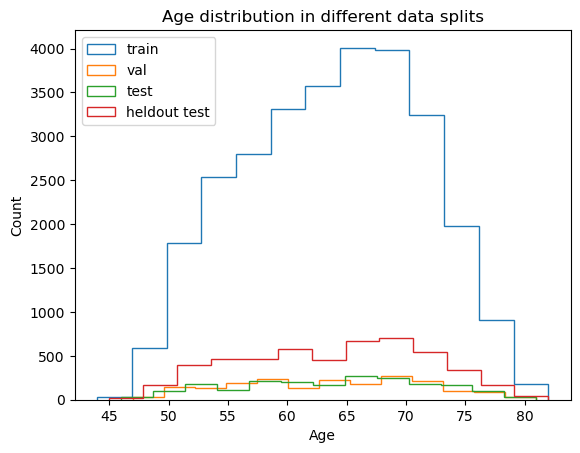

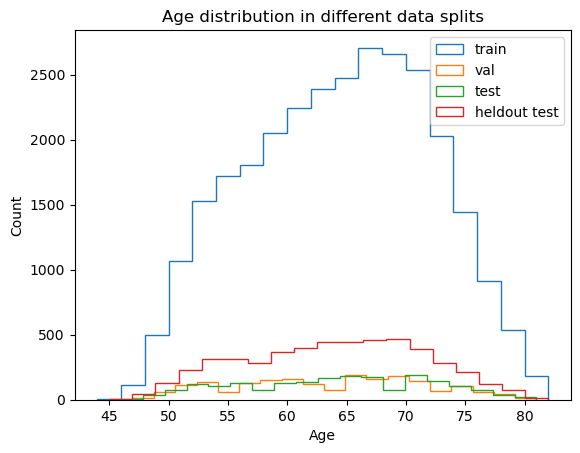

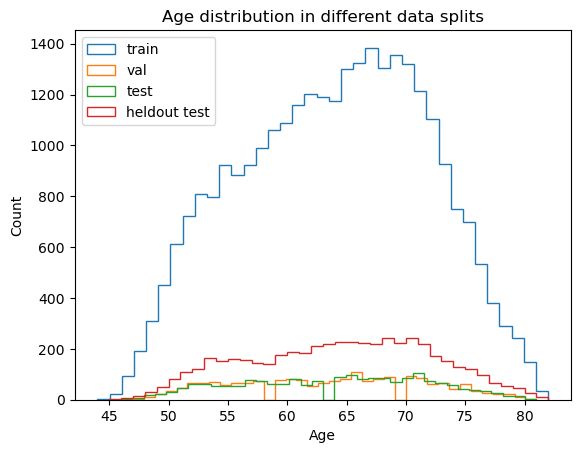

In [7]:
for bins in [13,19,37]:
    plt.hist(train_df['age'], bins=bins, histtype='step', label='train')
    plt.hist(val_df['age'], bins=bins, histtype='step', label='val')
    plt.hist(test_df['age'], bins=bins, histtype='step', label='test')
    plt.hist(heldout_test_df['age'], bins=bins, histtype='step', label='heldout test')
    plt.title('Age distribution in different data splits')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

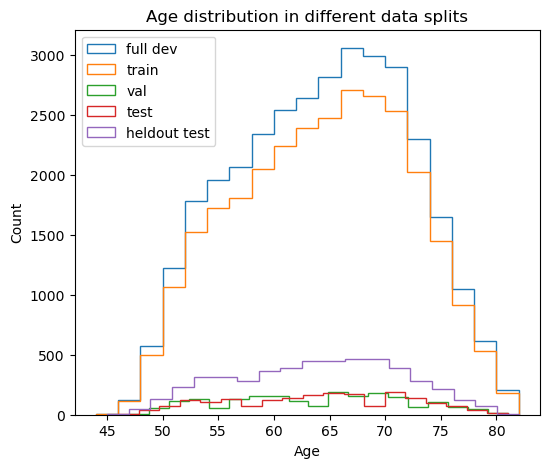

In [8]:
bins = 19
fig, axes = plt.subplots(1,figsize=(6, 5))
plt.hist(data_df['age'], bins=bins, histtype='step', label='full dev')
axes.hist(train_df['age'], bins=bins, histtype='step', label='train')
axes.hist(val_df['age'], bins=bins, histtype='step', label='val')
axes.hist(test_df['age'], bins=bins, histtype='step', label='test')
axes.hist(heldout_test_df['age'], bins=bins, histtype='step', label='heldout test')
axes.set(title='Age distribution in different data splits',
         xlabel='Age',
         ylabel='Count')
axes.legend(loc='upper left')
# fig.savefig(fig_path+'age_distribution.pdf')
fig.show()

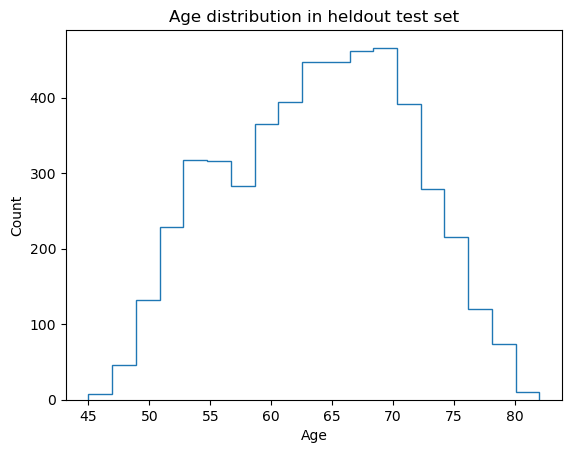

In [9]:
plt.hist(heldout_test_df['age'], bins=bins, histtype='step', label='heldout test')
plt.title('Age distribution in heldout test set')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Disease distributions

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from brain_age_prediction import utils

fig_path = '../viz/'

In [8]:
# save path for predictions
preds_path = '/ritter/share/projects/laura_riedel_thesis/predictions/'
# load data overview
data_overview_full = pd.read_csv(preds_path+'predictions_overview_100-500p.csv')
# limit to IDs present in heldout test set
heldout_df = data_overview_full[data_overview_full['split']=='heldout_test'].copy()
heldout_df.reset_index(inplace=True,drop=True)
# limit to IDs present in train set
train_df = data_overview_full[data_overview_full['split']=='train'].copy()
train_df.reset_index(inplace=True,drop=True)

In [11]:
data_overview_full.describe()

,eid,age,bmi,digit substitution,education,fluid intelligence,grip,depressive episode,all depression,recurrent depressive disorder,...,weekly beer,genetic pc 1,genetic pc 2,genetic pc 3,batch_nb_orig,predicted_age_orig,batch_nb_new,predicted_age_new,bag_orig,bag_new
count,3.785600e+04,37856.000000,36569.000000,25591.000000,37479.000000,34976.000000,36523.000000,32822.000000,32877.000000,28500.000000,...,26887.000000,36951.000000,36951.000000,36951.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.233806e+06,63.881128,26.497299,18.887578,16.773286,6.610590,30.941160,0.138017,0.139459,0.007298,...,2.182467,-7.010182,1.151470,-0.779809,19.032000,64.395289,19.032000,64.377771,0.498689,0.481171
std,1.382295e+05,7.667108,4.362114,5.272065,4.352322,2.056613,10.536242,0.344923,0.346430,0.085119,...,3.913608,34.395382,22.378117,12.141622,11.275123,5.622703,11.275123,5.522308,5.553401,5.481446
min,1.000014e+06,44.000000,13.388000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.000000,-18.508700,-279.234000,-139.722000,0.000000,46.696949,0.000000,45.954620,-21.213188,-21.445992
25%,1.118022e+06,58.000000,23.490900,16.000000,13.000000,5.000000,23.000000,0.000000,0.000000,0.000000,...,0.000000,-13.400400,2.499680,-2.662570,9.000000,60.427558,9.000000,60.489405,-3.335500,-3.348375
50%,1.234713e+06,64.000000,25.887300,19.000000,19.000000,7.000000,30.000000,0.000000,0.000000,0.000000,...,1.000000,-12.255500,3.660330,-1.526960,19.000000,64.438694,19.000000,64.446701,0.473392,0.406349
75%,1.347265e+06,70.000000,28.793000,23.000000,20.000000,8.000000,38.000000,0.000000,0.000000,0.000000,...,3.000000,-10.966200,4.736415,-0.326605,29.000000,68.486275,29.000000,68.424583,4.181225,4.164459
max,2.672560e+06,82.000000,58.044900,37.000000,20.000000,13.000000,90.000000,1.000000,1.000000,1.000000,...,56.000000,415.808000,84.666000,95.993300,39.000000,81.600807,39.000000,81.724228,22.668129,20.507858


In [25]:
var_columns = ['depressive episode', 'all depression',
               'recurrent depressive disorder', 'multiple sclerosis']

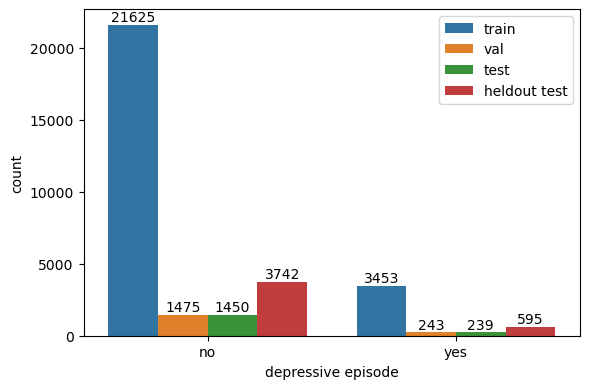

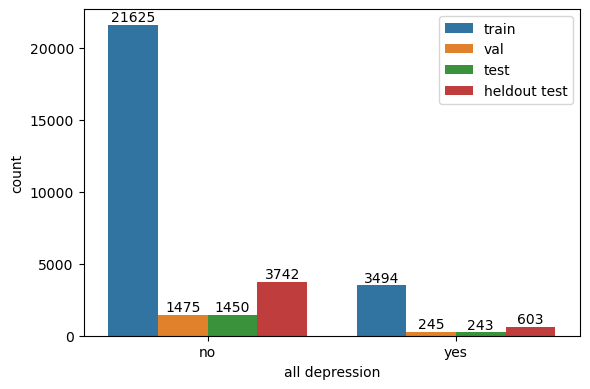

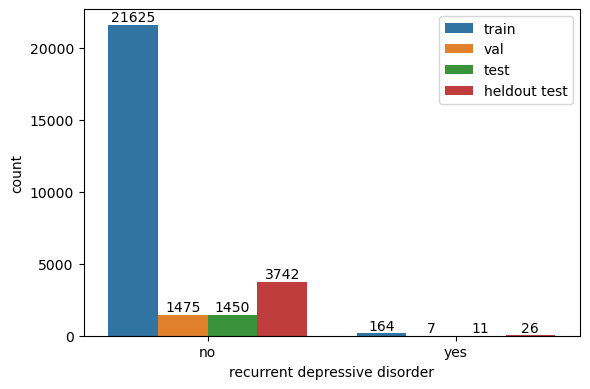

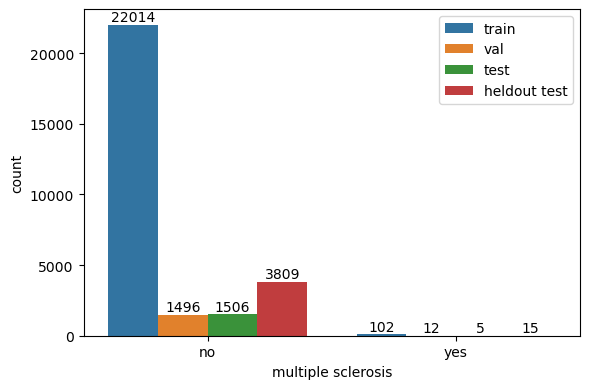

In [42]:
for variable in var_columns:
    fig, ax = plt.subplots(figsize=(6,4))
    sns.countplot(data=data_overview_full,
                x=variable,
                hue='split',
                ax=ax)
    for container in ax.containers:
        ax.bar_label(container, padding=.5) 
    ax.set(xticklabels=['no','yes'])
    ax.legend(['train','val','test', 'heldout test'])
    fig.tight_layout()
    fig.savefig(fig_path+'countplot_'+variable.replace(' ','_')+'.png')
    fig.show()

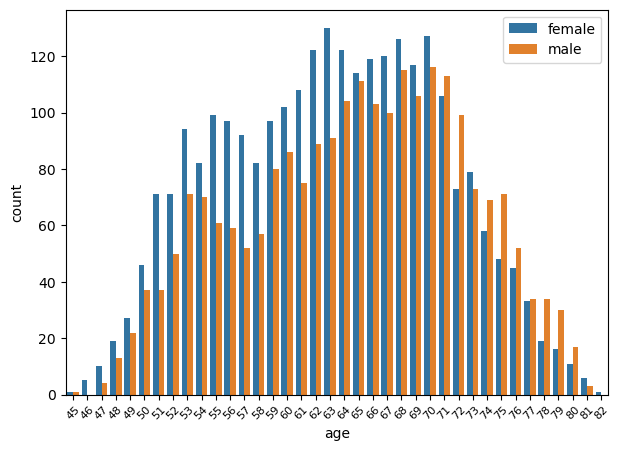

In [12]:
fig, axes = plt.subplots(1,figsize=(7, 5))
sns.countplot(data=heldout_df, x='age', hue='sex',ax=axes)
axes.tick_params(axis="x", labelsize=8, labelrotation=45)
axes.legend(['female','male'])
plt.savefig(fig_path+'sex_distribution_heldout.pdf', bbox_inches='tight')
fig.show()